In [ ]:
%pip install micro-learn

RMSE for Comfort prediction: 0.29
RMSE for Safety prediction: 0.29


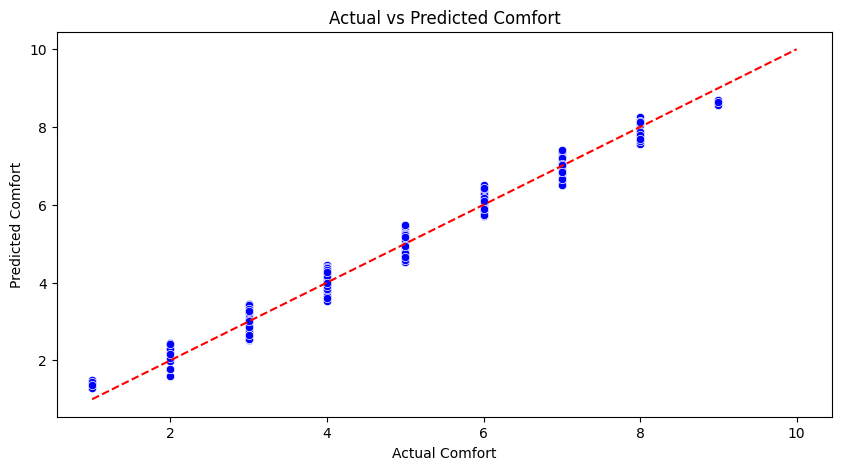

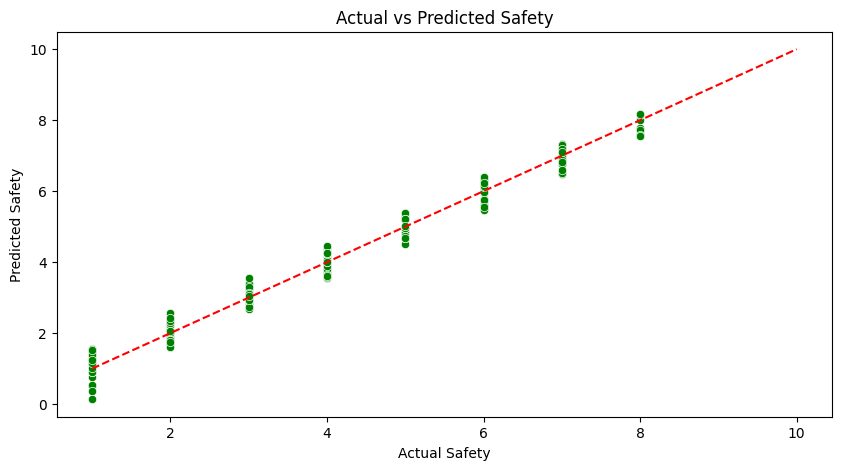

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your own path or use Google Drive)
from google.colab import files

# Assuming you uploaded the file "passenger_comfort_safety_dataset.csv"
df = pd.read_csv('vehicle.csv')

# Check the structure of the dataset
df.head()

# Split the data into features (X) and combine both Comfort and Safety into one target (y)
X = df[['accelerometer', 'speedometer', 'temperature', 'jerk', 'sound_level']]
y = df[['comfort', 'safety']]  # Combined targets for multi-output regression

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a multi-output Linear Regression model for both Comfort and Safety
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Comfort and Safety values on the test set
y_pred = model.predict(X_test)

# Evaluate the model for Comfort
comfort_rmse = np.sqrt(mean_squared_error(y_test['comfort'], y_pred[:, 0]))
print(f"RMSE for Comfort prediction: {comfort_rmse:.2f}")

# Evaluate the model for Safety
safety_rmse = np.sqrt(mean_squared_error(y_test['safety'], y_pred[:, 1]))
print(f"RMSE for Safety prediction: {safety_rmse:.2f}")

# Plot actual vs predicted values for Comfort
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test['comfort'], y=y_pred[:, 0], color='blue')
plt.plot([1, 10], [1, 10], color='red', linestyle='--')
plt.title("Actual vs Predicted Comfort")
plt.xlabel("Actual Comfort")
plt.ylabel("Predicted Comfort")
plt.show()

# Plot actual vs predicted values for Safety
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test['safety'], y=y_pred[:, 1], color='green')
plt.plot([1, 10], [1, 10], color='red', linestyle='--')
plt.title("Actual vs Predicted Safety")
plt.xlabel("Actual Safety")
plt.ylabel("Predicted Safety")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from microlearn.offloader import Offload

# Load the dataset (replace with your own path)
df = pd.read_csv('vehicle.csv')

# Split the data into features (X) and combine both Comfort and Safety into one target (y)
X = df[['accelerometer', 'speedometer', 'temperature', 'jerk', 'sound_level']]
y = df[['comfort', 'safety']]  # Combined targets for multi-output regression

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a multi-output Linear Regression model for both Comfort and Safety
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model for Comfort
comfort_rmse = np.sqrt(mean_squared_error(y_test['comfort'], model.predict(X_test)[:, 0]))
print(f"RMSE for Comfort prediction: {comfort_rmse:.2f}")

# Evaluate the model for Safety
safety_rmse = np.sqrt(mean_squared_error(y_test['safety'], model.predict(X_test)[:, 1]))
print(f"RMSE for Safety prediction: {safety_rmse:.2f}")

# Offload the model to Arduino code using microlearn
offloader = Offload(model)
offloader.export_to_arduino('linear_regression.ino')


RMSE for Comfort prediction: 0.29
RMSE for Safety prediction: 0.29
